In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate
import random
import tensorflow as tf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/onlinefraud.csv')

df.drop('isFlaggedFraud', axis=1, inplace=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192593 entries, 0 to 192592
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            192593 non-null  int64  
 1   type            192593 non-null  object 
 2   amount          192593 non-null  float64
 3   nameOrig        192592 non-null  object 
 4   oldbalanceOrg   192592 non-null  float64
 5   newbalanceOrig  192592 non-null  float64
 6   nameDest        192592 non-null  object 
 7   oldbalanceDest  192592 non-null  float64
 8   newbalanceDest  192592 non-null  float64
 9   isFraud         192592 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 14.7+ MB


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [ ]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
19445,8,CASH_OUT,74991.31,C275590290,0.00,0.00,C75474253,90685.00,155150.20,0.0
60875,9,PAYMENT,819.32,C1004933215,1372904.75,1372085.42,M1115837146,0.00,0.00,0.0
142181,11,CASH_OUT,318695.46,C1062776313,1035180.25,716484.80,C106616382,2534445.53,3896752.22,0.0
171785,12,PAYMENT,12402.92,C850542941,1197.00,0.00,M1642570991,0.00,0.00,0.0
152310,12,CASH_OUT,329133.72,C490182389,205970.00,0.00,C1521745346,709968.00,1573364.32,0.0


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
]

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='github',
        numalign='right'
    )
)

|    | columns        |   min value |   max value |
|----|----------------|-------------|-------------|
|  0 | amount         |        0.32 |       1e+07 |
|  1 | oldbalanceOrg  |           0 | 3.89394e+07 |
|  2 | newbalanceOrig |           0 | 3.89462e+07 |
|  3 | oldbalanceDest |           0 | 3.90396e+07 |
|  4 | isFraud        |           0 |           1 |


In [ ]:
# Downcast numerical columns with smaller dtype
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

# Use category dtype for categorical column
df['type'] = df['type'].astype('category')

In [ ]:
# Check duplicate values
df.duplicated().sum()

0

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8,6)

In [ ]:
df['step'].value_counts()

,count
step,
9,37628
11,37241
12,36153
10,35991
8,21097
13,10482
7,6837
1,2708
6,1660


<ipython-input-14-c316b7b7b898>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=df, palette='PuBu')


Text(0, 0.5, 'Number of transactions')

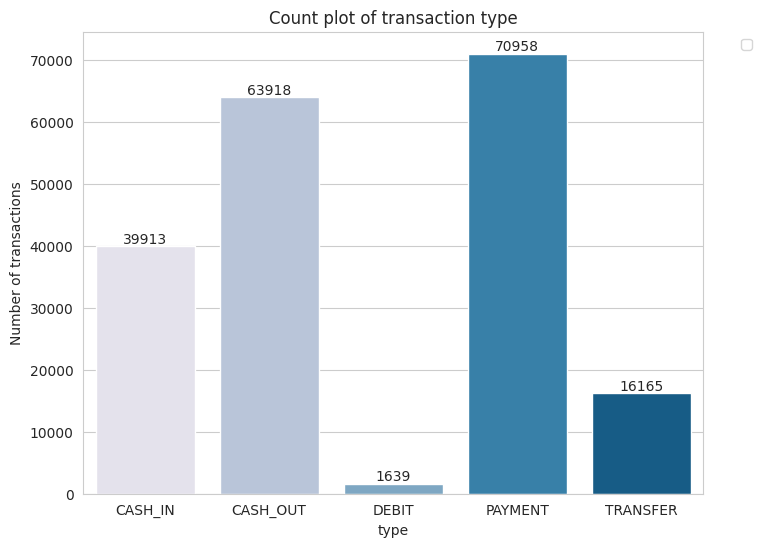

In [ ]:
ax = sns.countplot(x='type', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

Text(0.5, 1.0, 'Distribution of transaction amount')

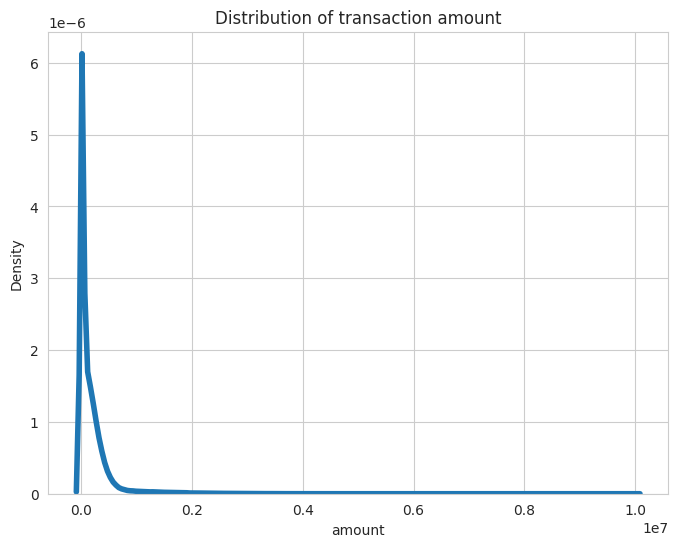

In [ ]:
sns.kdeplot(df['amount'], linewidth=4)
plt.title('Distribution of transaction amount')

In [ ]:
df['nameOrig'].value_counts()

,count
nameOrig,
C260230637,2
C1709295811,2
C44568807,2
C1231006815,1
C364907049,1
...,...
C1783206154,1
C1983967639,1
C1674685536,1


Text(0.5, 1.0, 'Distribution of transaction amount')

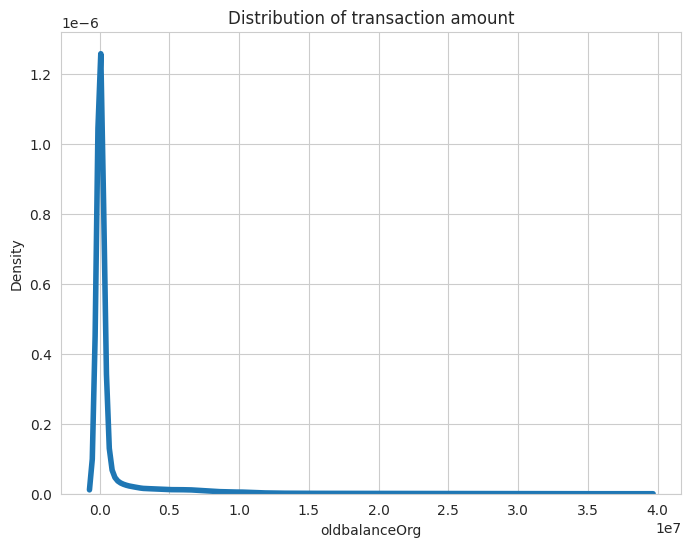

In [ ]:
sns.kdeplot(df['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of transaction amount')

Text(0.5, 1.0, 'Distribution of transaction amount')

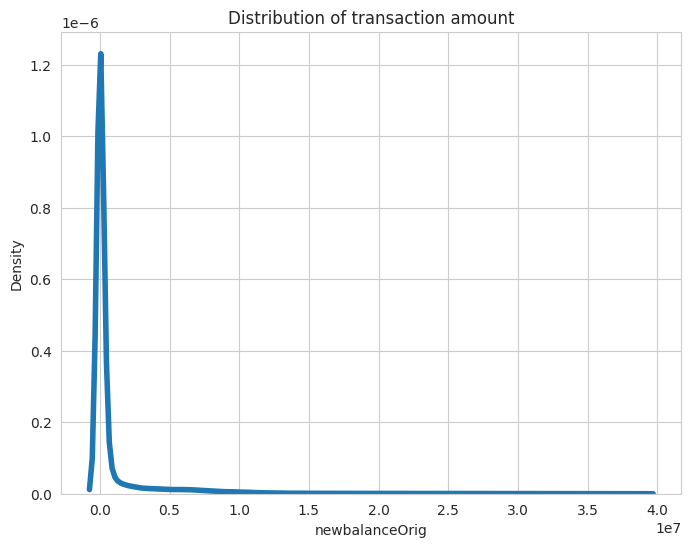

In [ ]:
sns.kdeplot(df['newbalanceOrig'], linewidth=4)
plt.title('Distribution of transaction amount')

In [ ]:
df['nameDest'].value_counts()

,count
nameDest,
C985934102,84
C1286084959,80
C248609774,75
C1590550415,74
C2083562754,74
...,...
M1053771937,1
M829033932,1
M318595157,1


Text(0.5, 1.0, 'Distribution of transaction amount')

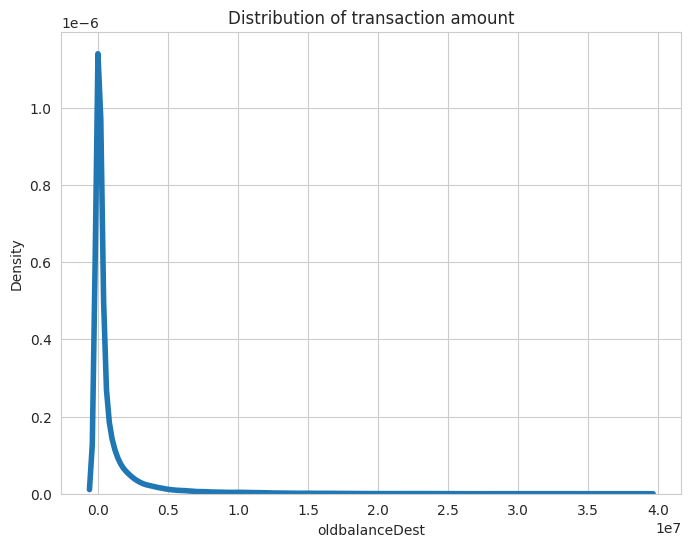

In [ ]:
sns.kdeplot(df['oldbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

Text(0.5, 1.0, 'Distribution of transaction amount')

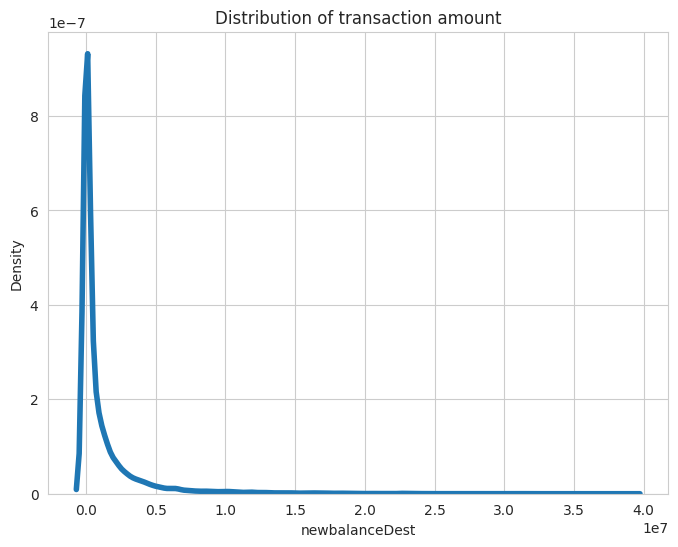

In [ ]:
sns.kdeplot(df['newbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

<ipython-input-22-d174391ea540>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='isFraud', data=df, palette='PuBu')


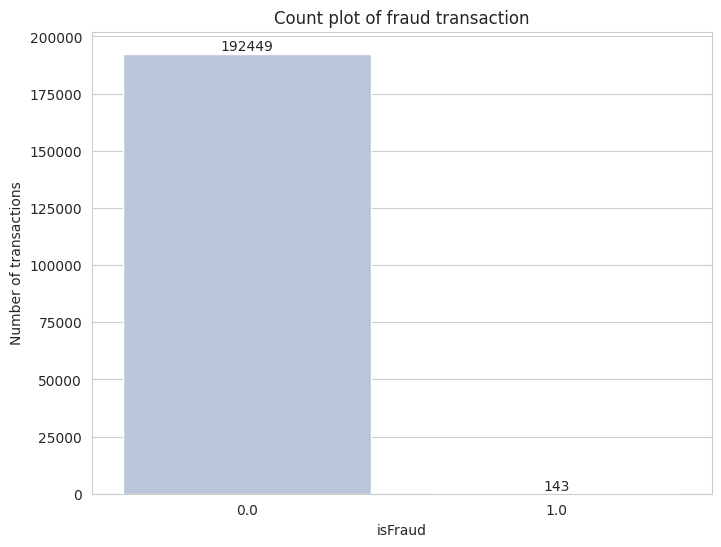

In [ ]:
ax = sns.countplot(x='isFraud', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

<ipython-input-23-6c0ccffb48ce>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby(['type', 'isFraud']).size().unstack()


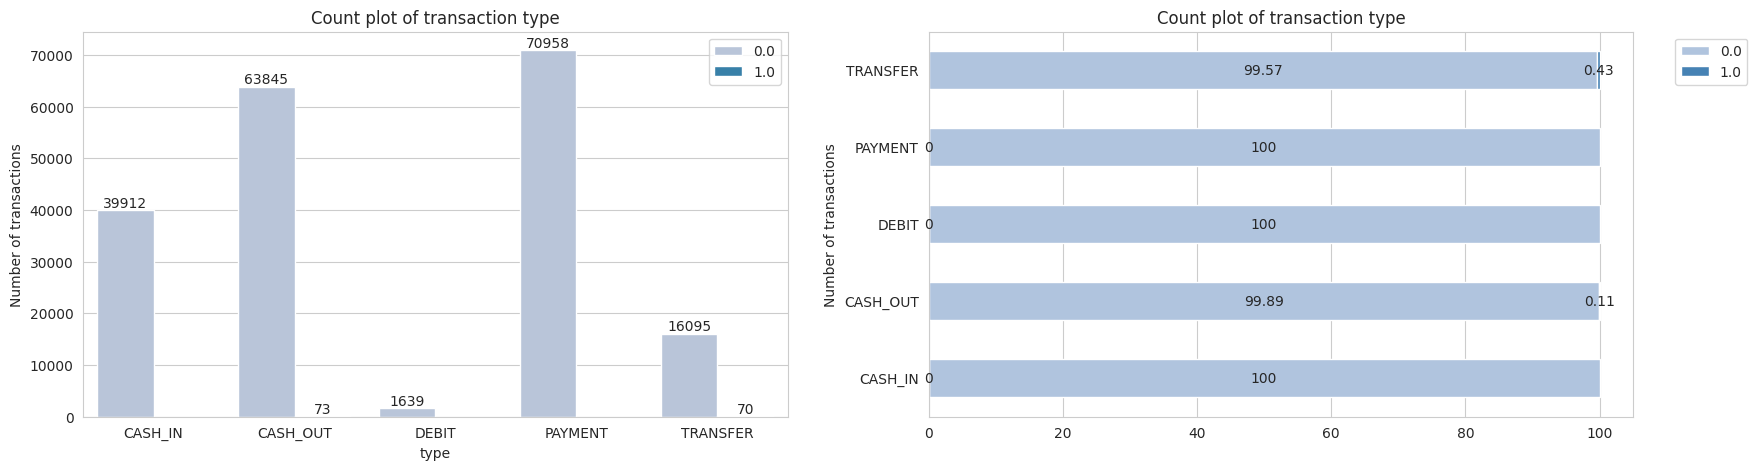

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='type', data=df, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = df.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

Text(0, 0.5, 'Number of transactions')

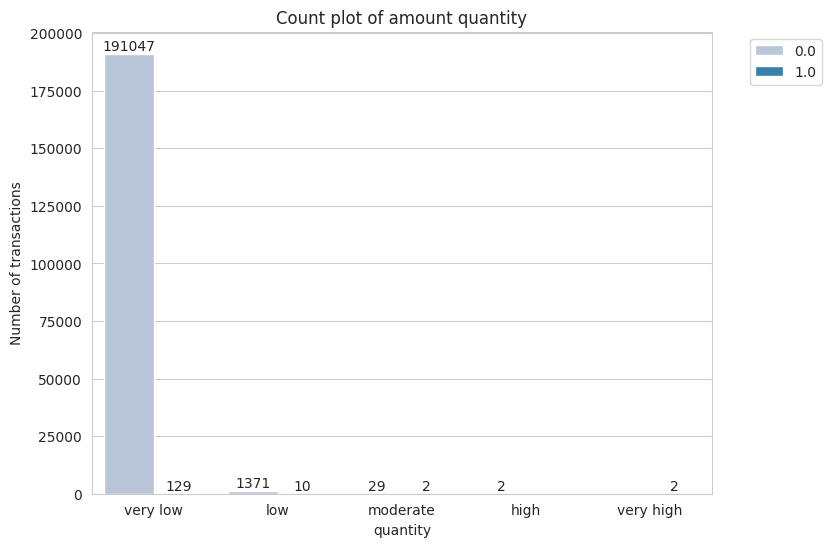

In [ ]:
df['quantity'] = pd.cut(df['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

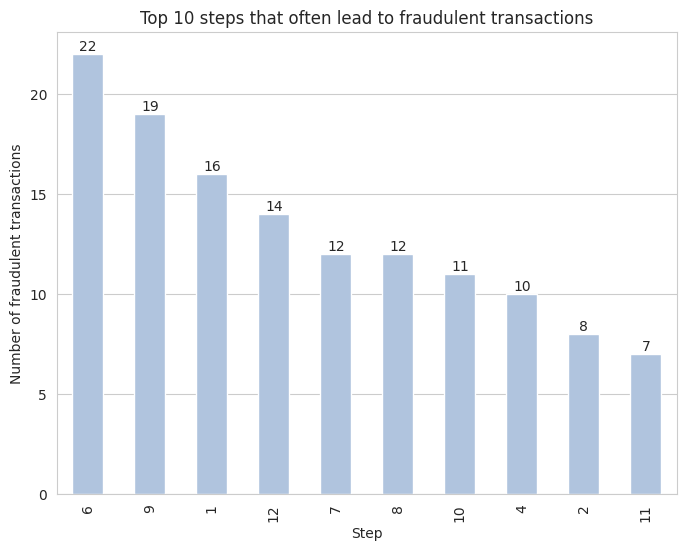

In [ ]:
df1 = df[df['isFraud']==1]
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, df2

Text(0.5, 0, 'Initial customers pre-transaction balance amount')

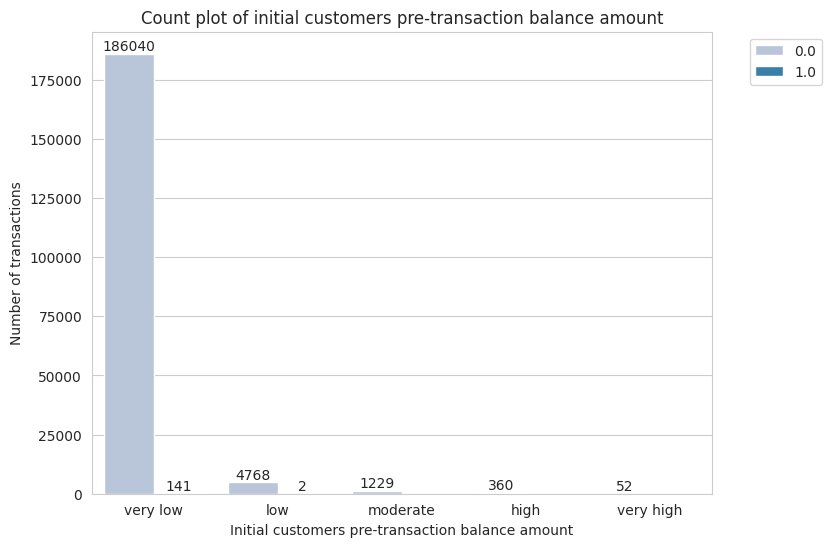

In [ ]:
df['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

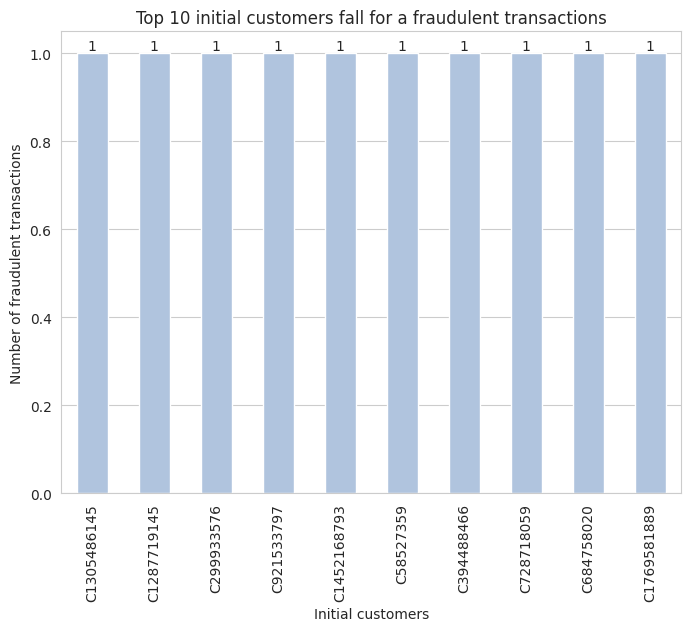

In [ ]:
df2 = df1['nameOrig'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')

del ax, df2

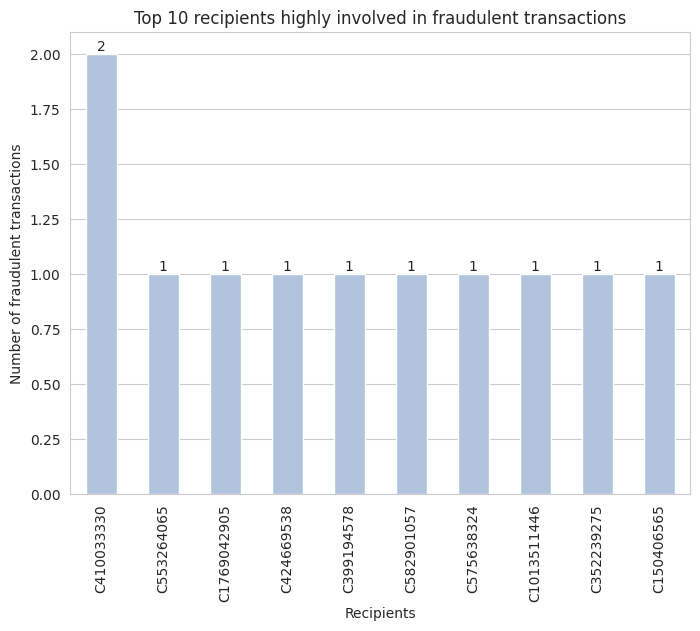

In [ ]:
df2 = df1['nameDest'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')

del ax, df2

Text(0.5, 0, 'Recipient pre-transaction balance amount')

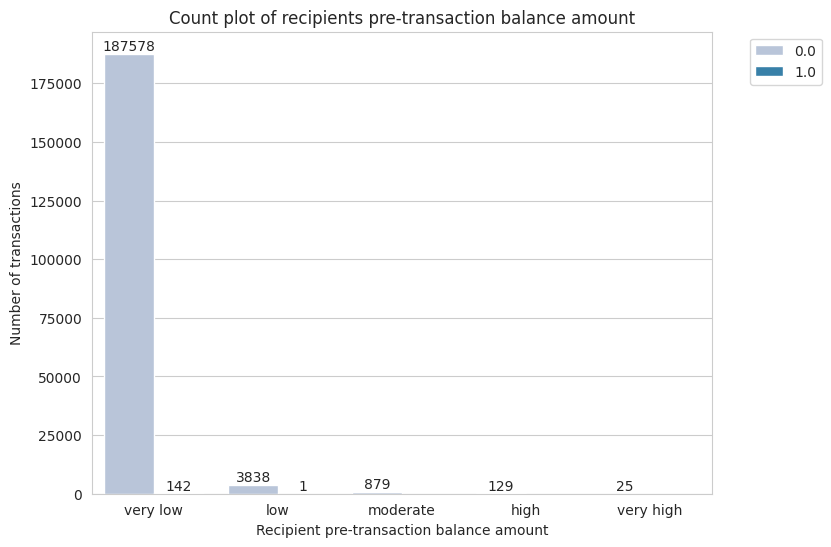

In [ ]:
df['oldbalanceDest_amt'] = pd.cut(df['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

Text(0.5, 1.0, 'Correlation')

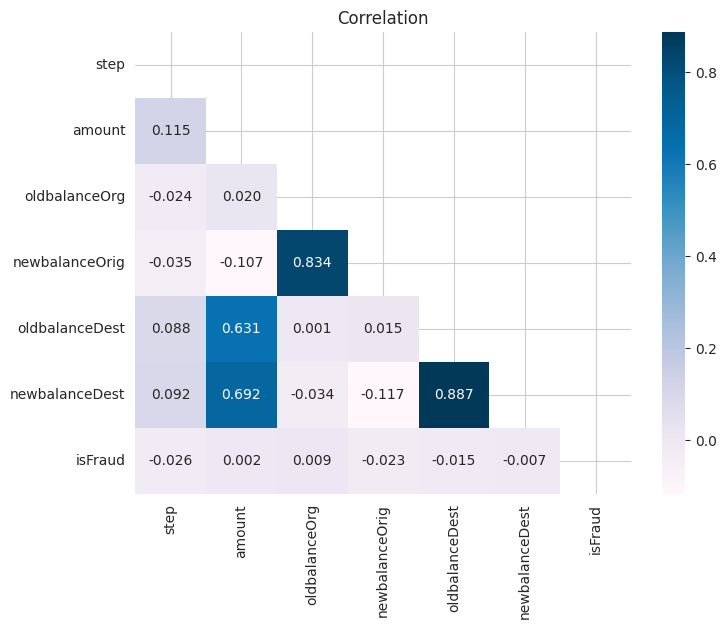

In [ ]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_features].corr('spearman')

# Plot the heatmap
sns.heatmap(corr_matrix, cbar=True, annot=True, mask=np.triu(np.ones_like(corr_matrix, dtype=bool)), fmt='.3f', cmap='PuBu')
plt.title('Correlation')

In [ ]:
# Data preprocessing
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay


seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


X = df.copy()
X.drop(['nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest', 'quantity', 'oldbalanceOrg_amt', 'oldbalanceDest_amt'], axis=1, inplace=True)
y = X.pop('isFraud')


# Handle NaN values in 'y' before splitting
# Option 1: Drop rows with NaN in 'y'
# X = X[y.notna()]
# y = y[y.notna()]

#Option 2: Fill NaN with a specific value (e.g., 0)
y = y.fillna(0)  # Or any strategy suitable for your data


# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)


X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
!pip install scikit-learn
# Add the import statement for SimpleImputer
from sklearn.impute import SimpleImputer

def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')
    for name, model in classifiers.items():
        print('{}:'.format(name))

        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

        for score in scoring:
            # Impute NaN values within each fold of cross-validation

            scores = cross_val_score(model, SimpleImputer().fit_transform(X), y, # Apply SimpleImputer to handle NaN values
                                      scoring=score, cv=skfold, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))

        print('\n')

In [ ]:
classifiers = { 'Random Forest Classifier':RandomForestClassifier(class_weight='balanced', random_state=seed),
                'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=seed)
              }

In [ ]:
model_comparison_evaluate(classifiers, X_train, y_train)

K-Fold Cross-Validation:

Random Forest Classifier:


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Mean accuracy score: 0.835 (0.062)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Mean precision score: 0.847 (0.082)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Mean recall score: 0.826 (0.091)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Mean f1 score: 0.832 (0.068)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Mean roc_auc score: 0.921 (0.043)


Logistic Regression:
Mean accuracy score: 0.765 (0.025)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Mean precision score: 0.789 (0.072)
Mean recall score: 0.748 (0.084)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Mean f1 score: 0.760 (0.021)
Mean roc_auc score: 0.848 (0.041)




/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Random Forest Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       0.90      1.00      0.94     34471
    Fraud [1]       0.82      0.01      0.01      4047

     accuracy                           0.90     38518
    macro avg       0.86      0.50      0.48     38518
 weighted avg       0.89      0.90      0.85     38518
 



Text(0.5, 0, 'False Positive Rate')

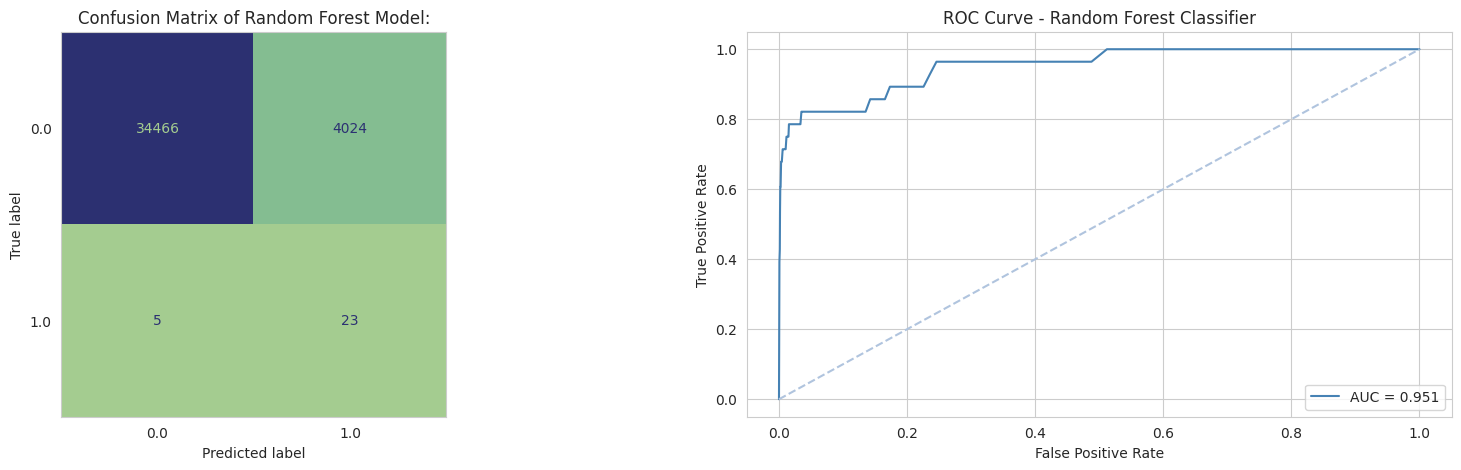

In [ ]:
model = RandomForestClassifier(class_weight='balanced', random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_score = model.predict_proba(X_test)[:,1]
print('Random Forest Classifier:')
print(classification_report(y_pred, y_test, labels=[0,1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')



fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)



fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)
ax[1].set_title('ROC Curve - Random Forest Classifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')